<a href="https://colab.research.google.com/github/abdularif0705/WinHacks-2022/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install geopandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
#Importing shapefiles
roads = gpd.read_file("/content/roads.shp")
natural = gpd.read_file("/content/natural.shp")
landuse = gpd.read_file("/content/landuse.shp")
buildings = gpd.read_file("/content/buildings.shp")
points = gpd.read_file("/content/points.shp")
places = gpd.read_file("/content/places.shp")
water = gpd.read_file("/content/waterways.shp")
railways = gpd.read_file("/content/railways.shp")

## **Windsor Geospatial Map**

Geo geometry data is stored as Vector objects such as:
* Point eg. buildings, houses, restaurants, pickup locations
* Line eg. streets, rivers, railway lines
* Polygon: Could contain holes eg. regions, districts, lakes, states, countries
* Multi Polygon: Collection of Polygons.

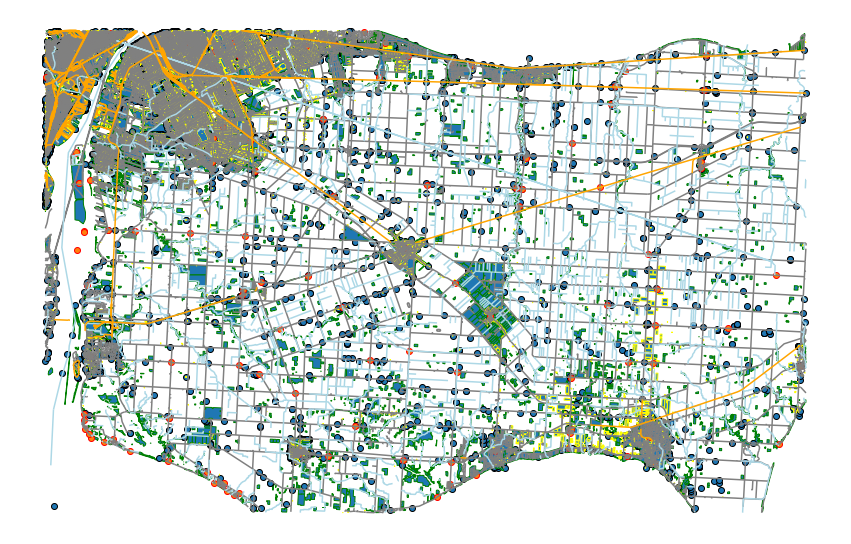

In [4]:
#dataset = ['places','roads','natural','buildings','landuse','water','railways','points']
fig, ax = plt.subplots(figsize = (15, 15))
natural.plot(ax = ax,edgecolor = 'green')
roads.plot(ax = ax,edgecolor = 'grey')
water.plot(ax = ax,edgecolor = 'lightblue')
points.plot(ax = ax,edgecolor = 'black')
landuse.plot(ax = ax,edgecolor = 'green')
railways.plot(ax = ax,edgecolor = 'orange')
buildings.plot(ax = ax,edgecolor = 'yellow')
places.plot(ax = ax,edgecolor = 'red')
ax.set_axis_off()
plt.show()

## **Individual Map File Analysis**

* Observing unique values and their respective number in each dataset and figuring out if it is an ideal place for a public charging station or not. 
* Dropping unnecessary columns 

### **Points**

In [5]:
points.sample(5)

,osm_id,timestamp,name,type,geometry
417,256342440,None,None,switch,POINT (-83.08195 42.26998)
4926,-1246266512,None,None,crossing,POINT (-83.02917 42.31059)
4673,-1567155487,None,Booster Juice,fast_food,POINT (-83.05984 42.24629)
2970,512998522,None,Ultramar,fuel,POINT (-83.06108 42.24782)
2871,243251084,None,None,turning_circle,POINT (-83.00671 42.30540)


In [6]:
points.shape

(5907, 5)

In [7]:
points['type'].value_counts()

crossing            1387
storage_tank         658
turning_circle       657
traffic_signals      424
street_lamp          377
                    ... 
charging_station       1
windmill               1
clock                  1
arts_centre            1
vending_machine        1
Name: type, Length: 111, dtype: int64

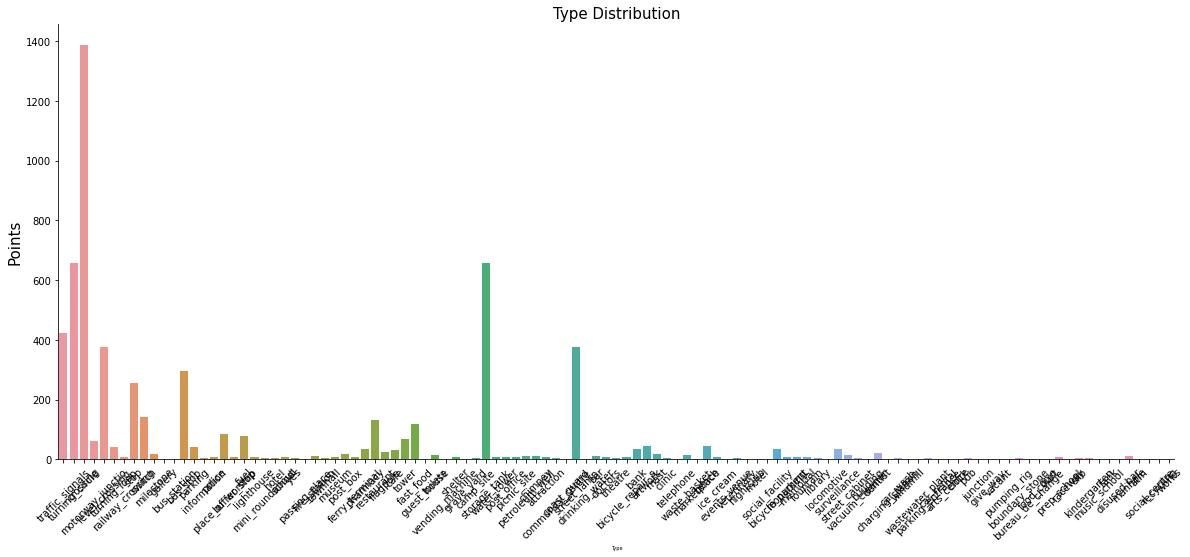

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'type', data = points)
ax.set_xlabel('Type', fontsize=5)
ax.set_ylabel('Points', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
ax.set_xticklabels(labels=points['type'].unique(),rotation=45)
sns.despine()

In [9]:
points['type'].unique()

array(['traffic_signals', 'turning_circle', 'crossing',
       'motorway_junctio', 'level_crossing', 'turning_loop',
       'railway_crossing', 'stop', 'switch', 'milestone', 'gallery',
       'bus_station', 'bus_stop', 'parking', 'information', 'police',
       'place_of_worship', 'buffer_stop', 'fuel', 'lighthouse',
       'mini_roundabout', 'hotel', 'school', 'yes', 'passing_place',
       'fire_station', 'townhall', 'museum', 'post_box', 'ferry_terminal',
       'pharmacy', 'restaurant', 'flagpole', 'cafe', 'tower', 'fast_food',
       'guest_house', 'toilets', 'vending_machine', 'shelter',
       'grave_yard', 'camp_site', 'storage_tank', 'water_tower',
       'post_office', 'picnic_site', 'petroleum_well', 'chimney',
       'attraction', 'community_centre', 'coast_guard', 'street_lamp',
       'drinking_water', 'bar', 'doctors', 'theatre', 'bicycle_repair_s',
       'bank', 'artwork', 'mast', 'clinic', 'telephone', 'waste_basket',
       'marketplace', 'bench', 'ice_cream', 'even

 **Here we can observe that it is practically useless and not feasible to have a charging station near a toilet, memorial etc. So good strategy to decrease the amount of processing data is to remove these rows.**

In [10]:
data = ['traffic_signals', 'turning_circle', 'crossing', 'level_crossing', 'turning_loop',
       'railway_crossing', 'stop', 'switch', 'gallery','parking', 'information',
       'place_of_worship', 'buffer_stop','lighthouse',
       'mini_roundabout', 'yes', 'passing_place',
       'fire_station', 'townhall', 'museum', 'post_box', 'ferry_terminal',
       'pharmacy', 'restaurant', 'flagpole', 'cafe', 'tower', 'fast_food', 'toilets', 'vending_machine', 'shelter',
       'grave_yard', 'storage_tank', 'water_tower',
       'post_office', 'picnic_site', 'petroleum_well', 'chimney',
       'attraction', 'community_centre', 'coast_guard', 'street_lamp',
       'drinking_water', 'bar', 'doctors', 'theatre',
       'bank', 'artwork', 'mast', 'clinic', 'telephone', 'waste_basket',
       'marketplace', 'bench', 'ice_cream', 'events_venue', 'veterinary',
       'nightclub', 'social_facility','monument', 'memorial', 'fountain', 'library', 'locomotive',
       'surveillance', 'street_cabinet', 'vacuum_cleaner', 
       'dentist', 'windmill','wastewater_plant', 'parking_entrance',
       'arts_centre', 'clock', 'pub', 'junction', 'give_way', 'vacant',
       'pumping_rig', 'boundary_stone', 'bureau_de_change', 'food_court',
       'dojo', 'prep_school', 'raceway', 'silo', 'kindergarten',
       'music_school', 'tank', 'disused:bar', 'manhole', 'atm',
       'social_centre', 'recycling', 'works']


# Dropping locations from data where installing Charging station is not feasible

for location in data:
  points.drop(points.loc[points['type'] == location ].index, inplace=True)

In [11]:
#Dropping useless columns
points =  points.drop(['timestamp','name'],axis=1)

In [12]:
points.head()

,osm_id,type,geometry
3,18354426,motorway_junctio,POINT (-82.55877 42.24257)
7,31920568,motorway_junctio,POINT (-82.95765 42.24757)
14,62579556,motorway_junctio,POINT (-83.11480 42.30335)
17,62596048,motorway_junctio,POINT (-83.09826 42.31087)
83,62690186,milestone,POINT (-83.14879 42.24251)


### **Buildings**

In [13]:
buildings.sample(5)

,osm_id,name,type,geometry
42510,783669918,None,None,"POLYGON ((-82.99257 42.24949, -82.99243 42.249..."
85846,948731284,None,house,"POLYGON ((-83.09030 42.23408, -83.09009 42.234..."
51005,783694186,None,None,"POLYGON ((-83.00636 42.28229, -83.00646 42.282..."
83706,942974549,None,house,"POLYGON ((-83.04893 42.24872, -83.04873 42.248..."
81091,787964481,None,None,"POLYGON ((-82.93824 42.25827, -82.93814 42.258..."


In [14]:
buildings.shape

(87791, 4)

In [15]:
buildings['type'].value_counts()

house              17180
garage              3316
commercial           278
industrial           265
retail               222
                   ...  
oil_tank               1
interlocking           1
public_building        1
coast_guard            1
works                  1
Name: type, Length: 88, dtype: int64

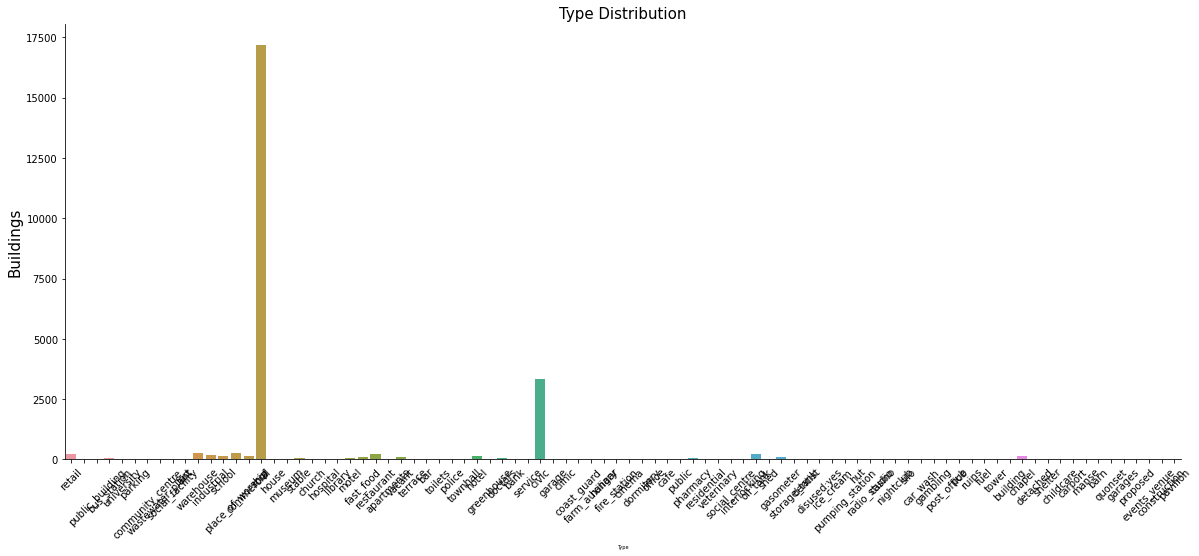

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'type', data = buildings)
ax.set_xlabel('Type', fontsize=5)
ax.set_ylabel('Buildings', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
ax.set_xticklabels(labels=buildings['type'].unique(),rotation=45)
sns.despine()

In [17]:
buildings['type'].unique()

array(['retail', None, 'public_building', 'bus_station', 'university',
       'parking', 'community_centre', 'wastewater_plant',
       'social_facility', 'fort', 'warehouse', 'industrial', 'school',
       'place_of_worship', 'commercial', 'roof', 'house', 'museum',
       'stable', 'church', 'hospital', 'library', 'motel', 'fast_food',
       'restaurant', 'apartments', 'vacant', 'terrace', 'bar', 'toilets',
       'police', 'townhall', 'hotel', 'greenhouse', 'doctors', 'bank',
       'service', 'civic', 'garage', 'clinic', 'coast_guard',
       'farm_auxiliary', 'hangar', 'fire_station', 'cinema', 'dormitory',
       'office', 'cafe', 'public', 'pharmacy', 'residential',
       'veterinary', 'social_centre', 'interlocking', 'oil_tank', 'shed',
       'gasometer', 'storage_tank', 'dentist', 'disused:yes', 'ice_cream',
       'pumping_station', 'hut', 'radio_studio', 'casino', 'nightclub',
       'silo', 'car_wash', 'gambling', 'post_office', 'pub', 'ruins',
       'fuel', 'tower', 'b

**Again we can observe that it is not feasible to have a charging station near a fort, oil tank, tower etc. So good strategy to decrease the amount of processing data is to remove these rows.**

In [18]:
data = ['None', 'public_building', 'community_centre', 'wastewater_plant',
       'social_facility', 'fort', 'warehouse', 'place_of_worship', 
       'commercial', 'roof', 'house', 'museum',
       'stable', 'church', 'library', 'fast_food',
       'restaurant', 'apartments', 'vacant', 'terrace', 'bar', 'toilets',
       'police', 'townhall', 'greenhouse', 'doctors', 'bank',
       'service', 'civic', 'clinic', 'coast_guard', 'farm_auxiliary', 
       'hangar', 'fire_station', 'cinema', 'dormitory', 'cafe', 'pharmacy',
       'veterinary', 'interlocking', 'oil_tank', 'shed',
       'gasometer', 'storage_tank', 'dentist', 'disused:yes', 'ice_cream', 'hut',
       'radio_studio', 'casino', 'nightclub', 'silo', 'gambling',
        'post_office', 'pub', 'ruins', 'tower', 'chapel', 'detached', 
       'shelter', 'childcare', 'manse', 'barn', 'quonset','proposed',
       'events_venue', 'construction', 'pavilion']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  buildings.drop(buildings.loc[buildings['type'] == location ].index, inplace=True)

In [19]:
buildings.drop(buildings.loc[buildings['type'] == None ].index, inplace=True)

In [20]:
#Dropping useless columns
buildings =  buildings.drop(['name'],axis=1)

In [21]:
buildings.head()

,osm_id,type,geometry
0,23348166,retail,"POLYGON ((-82.93770 42.31559, -82.93753 42.315..."
1,23348398,None,"POLYGON ((-82.93841 42.31250, -82.93825 42.312..."
2,23348456,retail,"POLYGON ((-82.94159 42.31351, -82.94135 42.313..."
4,23375623,retail,"POLYGON ((-82.92992 42.31544, -82.92992 42.315..."
5,23388679,bus_station,"POLYGON ((-83.04335 42.31790, -83.04315 42.317..."


### **Landuse**

In [22]:
landuse.sample(5)

,osm_id,name,type,geometry
63,179816036,None,cemetery,"POLYGON ((-82.74669 42.03405, -82.74660 42.035..."
300,488491838,None,industrial,"POLYGON ((-83.04376 42.22004, -83.04380 42.219..."
3147,988856845,None,industrial,"POLYGON ((-82.54908 42.23817, -82.54914 42.236..."
451,581411118,None,industrial,"POLYGON ((-83.11265 42.29983, -83.11221 42.299..."
3059,917078627,None,grass,"POLYGON ((-83.02135 42.21786, -83.02138 42.217..."


In [23]:
landuse.shape

(3342, 4)

In [24]:
landuse['type'].value_counts()

residential         1179
industrial           548
retail               499
grass                465
commercial           174
farmland             119
religious            106
brownfield            67
cemetery              61
reservoir             28
meadow                25
quarry                13
construction          12
landfill               9
basin                  8
farmyard               7
recreation_groun       6
allotments             4
railway                3
military               3
orchard                2
vineyard               1
civic_admin            1
plant_nursery          1
greenhouse_horti       1
Name: type, dtype: int64

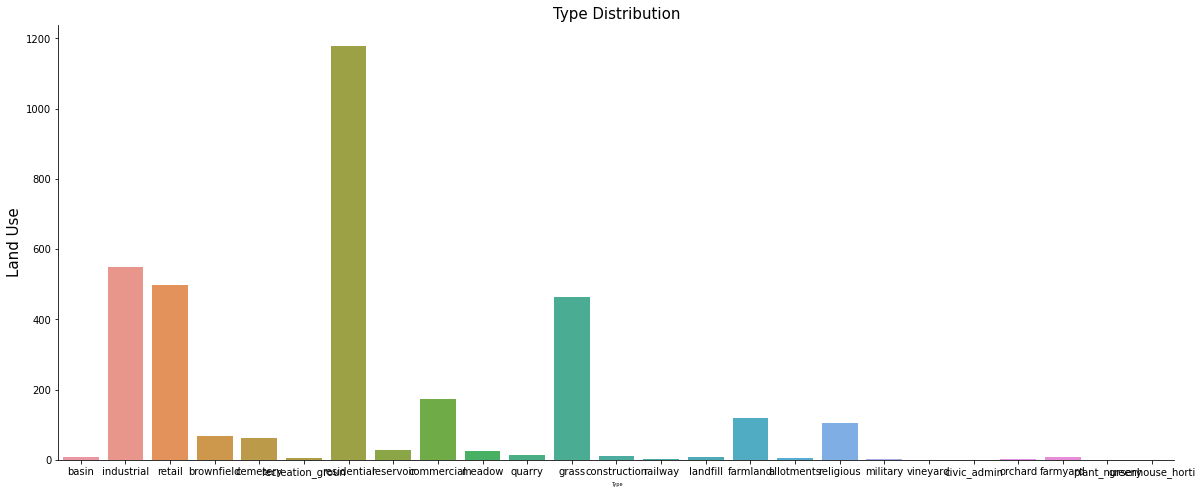

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'type', data = landuse)
ax.set_xlabel('Type', fontsize=5)
ax.set_ylabel('Land Use', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
sns.despine()

In [26]:
landuse['type'].unique()

array(['basin', 'industrial', 'retail', 'brownfield', 'cemetery',
       'recreation_groun', 'residential', 'reservoir', 'commercial',
       'meadow', 'quarry', 'grass', 'construction', 'railway', 'landfill',
       'farmland', 'allotments', 'religious', 'military', 'vineyard',
       'civic_admin', 'orchard', 'farmyard', 'plant_nursery',
       'greenhouse_horti'], dtype=object)

**Here we can easily notice that having a charging station near a grass, orchard etc. is not a great in sense of optimisation. So good strategy to decrease the amount of processing data is to remove these rows.**

In [27]:
data = ['basin', 'industrial', 'brownfield', 'cemetery',
       'recreation_groun', 'reservoir',
       'meadow', 'quarry', 'grass', 'construction', 'landfill',
       'farmland', 'allotments', 'religious', 'military', 'vineyard',
       'civic_admin', 'orchard', 'farmyard', 'plant_nursery',
       'greenhouse_horti']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  landuse.drop(landuse.loc[landuse['type'] == location ].index, inplace=True)

In [28]:
#Dropping useless columns
landuse =  landuse.drop(['name'],axis=1)

In [29]:
landuse.head()

,osm_id,type,geometry
3,23375580,retail,"POLYGON ((-83.02855 42.26674, -83.02798 42.265..."
4,23375626,retail,"POLYGON ((-82.92957 42.31667, -82.92903 42.314..."
5,23375632,retail,"POLYGON ((-82.93794 42.31317, -82.93224 42.314..."
6,23375640,retail,"POLYGON ((-82.94223 42.31734, -82.94086 42.315..."
7,23375653,retail,"POLYGON ((-82.94514 42.31525, -82.94202 42.315..."


### **Water**

In [30]:
water.sample(5)

,osm_id,name,type,width,geometry
355,204614286,None,stream,NaN,"LINESTRING (-82.90898 42.01667, -82.90891 42.0..."
1111,205003258,None,stream,NaN,"LINESTRING (-82.92989 42.22509, -82.92766 42.2..."
1903,205150599,None,stream,NaN,"LINESTRING (-82.62453 42.17121, -82.62453 42.1..."
3546,207117939,Ruscom River,stream,NaN,"LINESTRING (-82.61916 42.25062, -82.61937 42.2..."
1362,205140365,None,stream,NaN,"LINESTRING (-82.83248 42.17397, -82.83641 42.1..."


In [31]:
water.shape

(4007, 5)

In [32]:
water['type'].value_counts()

stream    3777
drain      160
ditch       38
river       24
dock         5
dam          2
canal        1
Name: type, dtype: int64

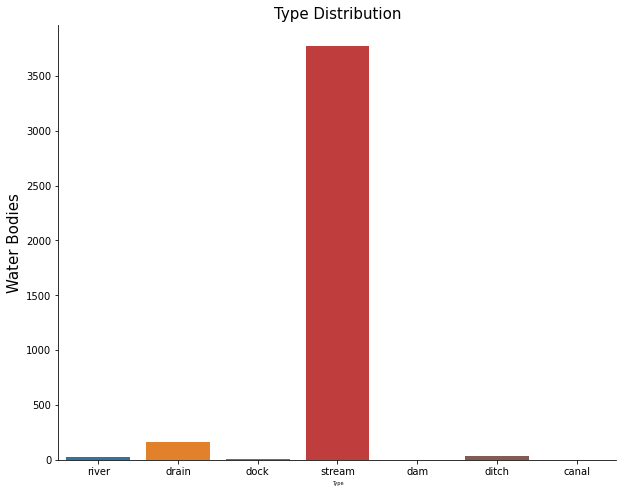

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'type', data = water)
ax.set_xlabel('Type', fontsize=5)
ax.set_ylabel('Water Bodies', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
sns.despine()

In [34]:
water['type'].unique()

array(['river', 'drain', 'dock', 'stream', 'dam', 'ditch', 'canal'],
      dtype=object)

**There is no way we can put a charging station inside a water body excpet a dockyard. So good strategy to decrease the amount of processing data is to remove these rows.**

In [35]:
data = ['river', 'drain','stream', 'dam', 'ditch', 'canal']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  water.drop(water.loc[water['type'] == location ].index, inplace=True)

In [36]:
#Dropping useless columns
water =  water.drop(['name','width'],axis=1)

In [37]:
water.head()

,osm_id,type,geometry
2,4894669,dock,"LINESTRING (-83.10137 42.27106, -83.10033 42.2..."
3867,560092401,dock,"LINESTRING (-83.12502 42.25973, -83.12485 42.2..."
3868,560092402,dock,"LINESTRING (-83.12444 42.25944, -83.12432 42.2..."
3900,641696037,dock,"LINESTRING (-82.70888 42.29813, -82.70891 42.2..."
3939,791845924,dock,"LINESTRING (-82.46652 42.30798, -82.46652 42.3..."


### **Railways**

In [38]:
railways.sample(5)

,osm_id,name,type,geometry
720,165265175,None,rail,"LINESTRING (-83.11995 42.28050, -83.12003 42.2..."
674,163519260,CSX Transportation Detroit Subdivision,rail,"LINESTRING (-83.13797 42.29287, -83.13825 42.2..."
244,160440638,None,rail,"LINESTRING (-83.00306 42.30816, -83.00296 42.3..."
831,165659037,Shore Line Subdivision,rail,"LINESTRING (-83.14731 42.24897, -83.14807 42.2..."
594,162762349,None,rail,"LINESTRING (-83.10079 42.29139, -83.10091 42.2..."


In [39]:
railways.shape

(1221, 4)

In [40]:
railways['type'].value_counts()

rail         1076
abandoned      86
disused        50
yard            7
turntable       1
razed           1
Name: type, dtype: int64

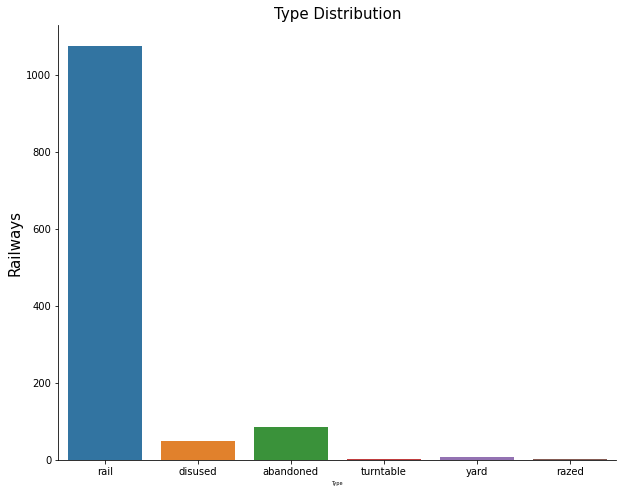

In [41]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'type', data = railways)
ax.set_xlabel('Type', fontsize=5)
ax.set_ylabel('Railways', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
sns.despine()

In [42]:
railways['type'].unique()

array(['rail', 'disused', 'abandoned', 'turntable', 'yard', 'razed'],
      dtype=object)

**We can use abandoned railway stations to create a charging station this will effectively utilise the space since it is a valuable landmark already. Dropping the rest of them.**

In [43]:
data = ['rail', 'disused', 'turntable', 'yard', 'razed']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  railways.drop(railways.loc[railways['type'] == location ].index, inplace=True)

In [44]:
#Dropping useless columns
railways =  railways.drop(['name'],axis=1)

In [45]:
railways.head()

,osm_id,type,geometry
39,8733493,abandoned,"LINESTRING (-83.13030 42.29039, -83.13040 42.2..."
52,8742730,abandoned,"LINESTRING (-83.14178 42.21921, -83.14211 42.2..."
54,8746328,abandoned,"LINESTRING (-83.12910 42.29239, -83.12939 42.2..."
55,8746363,abandoned,"LINESTRING (-83.11881 42.29049, -83.11872 42.2..."
96,23306775,abandoned,"LINESTRING (-82.95930 42.24705, -82.96014 42.2..."


### **Natural**

In [46]:
natural.sample(5)

,osm_id,name,type,geometry
231,179817854,None,forest,"POLYGON ((-82.74983 42.03530, -82.74985 42.034..."
2075,206177852,None,water,"POLYGON ((-83.05358 42.03359, -83.05378 42.033..."
1599,205705496,None,forest,"POLYGON ((-82.62098 42.06215, -82.62100 42.062..."
1231,205558270,None,forest,"POLYGON ((-82.64094 42.06403, -82.64090 42.064..."
1698,206008154,None,forest,"POLYGON ((-83.05282 42.23217, -83.05280 42.232..."


In [47]:
natural.shape

(2734, 4)

In [48]:
natural['type'].value_counts()

forest    1646
water      773
park       315
Name: type, dtype: int64

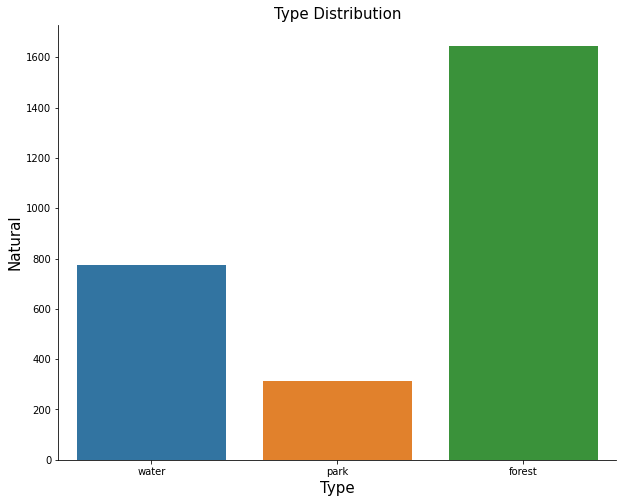

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'type', data = natural)
ax.set_xlabel('Type', fontsize=15)
ax.set_ylabel('Natural', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
sns.despine()

In [50]:
natural['type'].unique()

array(['water', 'park', 'forest'], dtype=object)

**Having a charging station inside a water body and forest is impossible without extra establishment cost so dropping them is a good idea. Parks can be counted in since it is a common place amongst locality residents we can give some area to the charging station for level 1 at least.**

In [51]:
data = ['water', 'forest']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  natural.drop(natural.loc[natural['type'] == location ].index, inplace=True)

In [52]:
#Dropping useless columns
natural =  natural.drop(['name'],axis=1)

In [53]:
natural.head()

,osm_id,type,geometry
10,23297293,park,"POLYGON ((-83.02329 42.25994, -83.02300 42.260..."
11,23306214,park,"POLYGON ((-82.94930 42.32060, -82.94827 42.318..."
12,23364273,park,"POLYGON ((-82.94569 42.30600, -82.94515 42.306..."
13,23388496,park,"POLYGON ((-83.02515 42.29622, -83.02513 42.296..."
14,23394507,park,"POLYGON ((-83.07646 42.29010, -83.07549 42.289..."


### **Roads**

In [54]:
roads.sample(5)

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
5548,31704977,McCain Sideroad,None,tertiary,0,0,NaN,"LINESTRING (-82.77643 42.06650, -82.77572 42.0..."
1594,23764451,Erie Street West,None,residential,0,0,NaN,"LINESTRING (-83.04658 42.30441, -83.04596 42.3..."
10341,421879271,Wyandotte Street West,None,secondary,0,0,NaN,"LINESTRING (-83.06307 42.30506, -83.06345 42.3..."
15133,650709305,None,None,footway,0,0,NaN,"LINESTRING (-83.01840 42.24867, -83.01878 42.2..."
11247,454920329,None,None,motorway_link,1,1,NaN,"LINESTRING (-83.08202 42.31786, -83.08196 42.3..."


In [55]:
roads.shape

(23329, 8)

In [56]:
roads['type'].value_counts()

service           8079
residential       6306
footway           3556
secondary         1440
tertiary          1180
unclassified       820
path               592
motorway           262
motorway_link      236
primary            175
trunk              156
cycleway           122
construction        89
trunk_link          83
secondary_link      67
track               55
tertiary_link       31
steps               27
pedestrian          18
raceway             12
proposed             8
corridor             7
primary_link         5
bridleway            2
living_street        1
Name: type, dtype: int64

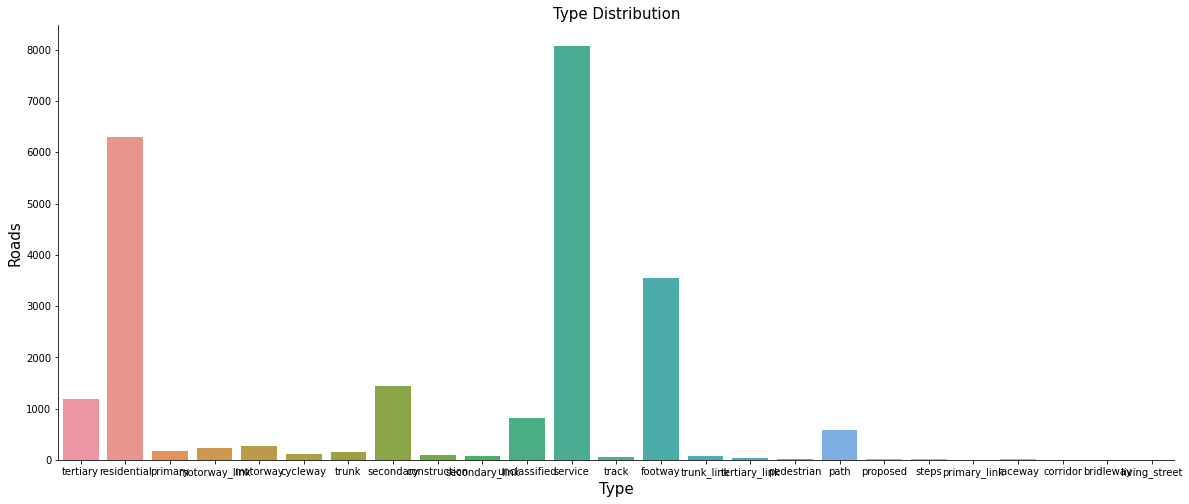

In [57]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'type', data = roads)
ax.set_xlabel('Type', fontsize=15)
ax.set_ylabel('Roads', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
sns.despine()

In [58]:
roads['type'].unique()

array(['tertiary', 'residential', 'primary', 'motorway_link', 'motorway',
       'cycleway', 'trunk', 'secondary', 'construction', 'secondary_link',
       'unclassified', 'service', 'track', 'footway', 'trunk_link',
       'tertiary_link', 'pedestrian', 'path', 'proposed', 'steps',
       'primary_link', 'raceway', 'corridor', 'bridleway',
       'living_street'], dtype=object)

Dropping roads which are less visited and unlikely to have an establishment.

In [59]:
data = ['trunk','construction', 'secondary_link', 'unclassified', 'service',
         'track', 'footway', 'trunk_link', 'tertiary_link', 'pedestrian', 
         'path', 'proposed', 'steps', 'primary_link', 'raceway', 
         'corridor', 'bridleway']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  roads.drop(roads.loc[roads['type'] == location ].index, inplace=True)

In [60]:
#Dropping useless columns
roads =  roads.drop(['name','ref','oneway','bridge','maxspeed'],axis=1)

In [61]:
roads.head()

,osm_id,type,geometry
0,2627409,tertiary,"LINESTRING (-83.01725 42.25474, -83.01641 42.2..."
1,2627414,residential,"LINESTRING (-83.01614 42.25493, -83.01537 42.2..."
2,2628245,residential,"LINESTRING (-83.01424 42.24476, -83.01412 42.2..."
3,2628285,residential,"LINESTRING (-83.01615 42.24740, -83.01611 42.2..."
4,2628294,residential,"LINESTRING (-83.01267 42.24507, -83.01291 42.2..."


### **Places**

In [62]:
places.sample(5)

,osm_id,name,type,population,geometry
94,-2133037912,Roseland,neighbourhood,NaN,POINT (-82.98747 42.25606)
5,254023816,Tecumseh,town,NaN,POINT (-82.88620 42.31180)
34,2147153582,New Canaan,locality,NaN,POINT (-82.93565 42.12000)
12,286883445,Cottam,village,NaN,POINT (-82.74415 42.12859)
70,-2138205281,Cherry Lane Estates,locality,NaN,POINT (-82.59576 42.02954)


In [63]:
places.shape

(124, 5)

In [64]:
places['type'].value_counts()

locality            58
neighbourhood       24
village              9
town                 9
island               9
hamlet               9
county               2
city                 1
village;locality     1
islet                1
suburb               1
Name: type, dtype: int64

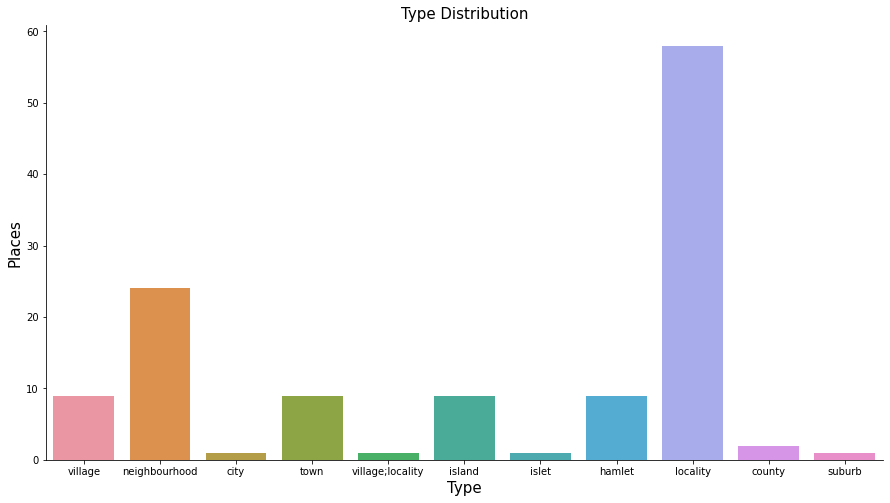

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'type', data = places)
ax.set_xlabel('Type', fontsize=15)
ax.set_ylabel('Places', fontsize=15)
ax.set_title('Type Distribution', fontsize=15)
sns.despine()

In [66]:
places['type'].unique()

array(['village', 'neighbourhood', 'city', 'town', 'village;locality',
       'island', 'islet', 'hamlet', 'locality', 'county', 'suburb'],
      dtype=object)

**Installing a charging station at a village is useless since people might not be able to afford such luxury at the moment and the probability of villagers to have a self owned transport is less likely as well and if they have one it is for multipurpose and electric vehicle may not serve them the best.**

In [67]:
data = ['village', 'neighbourhood', 'village;locality',
       'island', 'islet', 'hamlet', 'locality']

# Dropping locations from data where installing Charging station is not feasible

for location in data:
  places.drop(places.loc[places['type'] == location ].index, inplace=True)

In [68]:
#Dropping useless columns
places =  places.drop(['name','population'],axis=1)

In [69]:
places.head()

,osm_id,type,geometry
3,253421090,city,POINT (-83.03534 42.31710)
4,254023814,town,POINT (-83.06065 42.24506)
5,254023816,town,POINT (-82.88620 42.31180)
7,260233622,town,POINT (-82.59970 42.05312)
8,260234802,town,POINT (-82.82155 42.17448)


## **Combined Analysis**

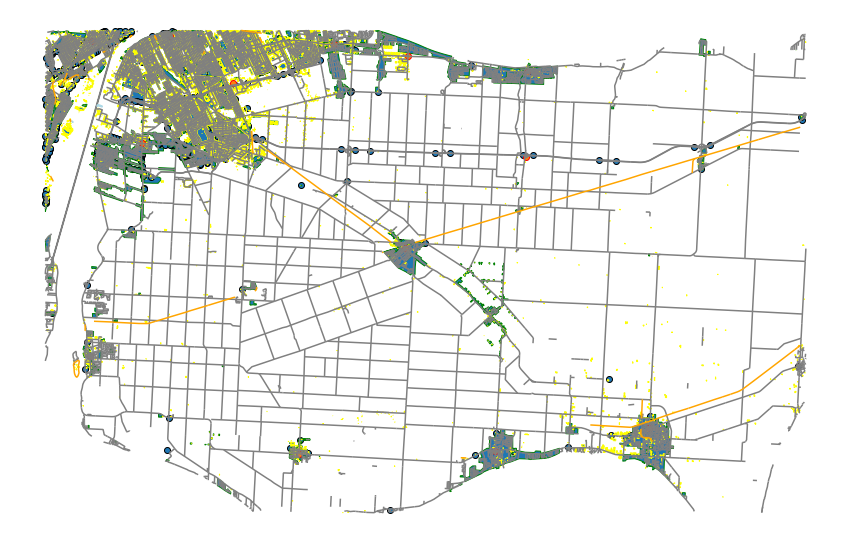

In [70]:
fig, ax = plt.subplots(figsize = (15, 15))
natural.plot(ax = ax,edgecolor = 'green')
roads.plot(ax = ax,edgecolor = 'grey')
water.plot(ax = ax,edgecolor = 'lightblue')
points.plot(ax = ax,edgecolor = 'black')
landuse.plot(ax = ax,edgecolor = 'green')
railways.plot(ax = ax,edgecolor = 'orange')
buildings.plot(ax = ax,edgecolor = 'yellow')
places.plot(ax = ax,edgecolor = 'red')
ax.set_axis_off()
plt.show()

In [71]:
#Merging all data together
combined = roads.append(natural)
combined = combined.append(points)
combined = combined.append(landuse)
combined = combined.append(water)
combined = combined.append(places)
combined = combined.append(buildings)
combined = combined.append(railways)

In [72]:
combined.shape

(81088, 3)

In [73]:
combined = combined.drop_duplicates()
combined.sample(5)

,osm_id,type,geometry
47898,783677598,None,"POLYGON ((-82.98893 42.30803, -82.98889 42.307..."
22305,782193696,None,"POLYGON ((-82.89687 42.31586, -82.89690 42.315..."
42622,783670030,None,"POLYGON ((-82.98600 42.24517, -82.98592 42.245..."
737,656962538,residential,"POLYGON ((-82.92392 42.03676, -82.92344 42.036..."
3238,31699858,residential,"LINESTRING (-83.00949 42.28194, -83.00826 42.2..."


In [74]:
combined['type'].unique()

array(['tertiary', 'residential', 'primary', 'motorway_link', 'motorway',
       'cycleway', 'secondary', 'living_street', 'park',
       'motorway_junctio', 'milestone', 'bus_station', 'bus_stop',
       'police', 'fuel', 'hotel', 'school', 'guest_house', 'camp_site',
       'bicycle_repair_s', 'motel', 'bicycle_parking', 'building',
       'charging_station', 'car_wash', 'car_rental', 'retail',
       'commercial', 'railway', 'dock', 'city', 'town', 'county',
       'suburb', None, 'university', 'parking', 'industrial', 'hospital',
       'garage', 'office', 'public', 'social_centre', 'pumping_station',
       'carport', 'garages', 'works', 'abandoned'], dtype=object)

**We can observe a lot of categories in the type column which can be grouped into similar entitites for easy understanding and machine learning modelling. So based on human understanding we map the places with 2 categories of charging stations that the place is likely to have**
* **Public**
* **Private**

**We create another column and manually map the types with their respective potential charging station**

In [75]:
combined['charging_station'] = combined['type'].map({'tertiary':'public', 'residential':'private', 
                      'primary':'public', 'motorway_link':'public', 'motorway':'public',
                      'cycleway':'public', 'secondary':'public', 'living_street':'public', 
                      'park':'public', 'motorway_junctio':'public', 
                      'milestone':'public', 'bus_station':'public', 'bus_stop':'public',
                      'police':'private', 'fuel':'public', 'hotel':'private',
                      'school':'private', 'guest_house':'private', 'camp_site':'public',
                      'bicycle_repair_s':'public', 'motel':'private', 
                      'bicycle_parking':'public', 'building':'private',
                      'charging_station':'public', 'car_wash':'private', 
                      'car_rental':'private', 'retail':'public', 'commercial':'public', 
                      'railway':'public', 'dock':'public', 'town':'public', 'county':'public',
                       'None':'public', 'university':'private', 'parking':'public', 
                      'industrial':'private', 'hospital':'public', 'garage':'private', 
                      'office':'private', 'public':'public', 'social_centre':'public',
                      'pumping_station':'public', 'carport':'public', 'garages':'public',
                      'works':'private', 'abandoned':'public', 'city':'public' ,'suburb':'public'})

In [76]:
combined.head()

,osm_id,type,geometry,charging_station
0,2627409,tertiary,"LINESTRING (-83.01725 42.25474, -83.01641 42.2...",public
1,2627414,residential,"LINESTRING (-83.01614 42.25493, -83.01537 42.2...",private
2,2628245,residential,"LINESTRING (-83.01424 42.24476, -83.01412 42.2...",private
3,2628285,residential,"LINESTRING (-83.01615 42.24740, -83.01611 42.2...",private
4,2628294,residential,"LINESTRING (-83.01267 42.24507, -83.01291 42.2...",private


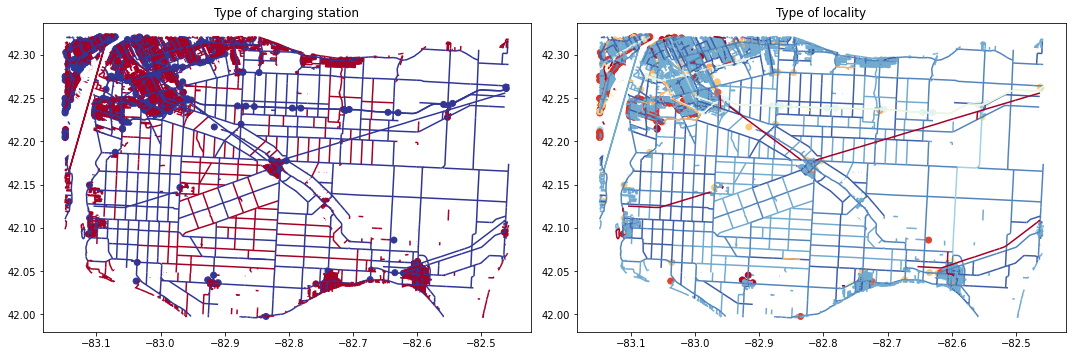

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 15))
combined.plot(column='charging_station', cmap='RdYlBu', ax=ax1)
ax1.set_title('Type of charging station')
combined.plot(column='type', cmap='RdYlBu', ax=ax2)
ax2.set_title('Type of locality')
plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.show()

## **Machine Learning**

Since we do not have data of previous charging stations we will utilise the map data to predict for more public charging stations. Initially we use only one feature that is geolocation and predict the type of charging station possible. 

Additionally we will also try out taking the type as feature and encoding it with label encoder to see iif we can make any meaningful guess from that.

### **Data Preparation**

In [78]:
'''
roads['type'] = "road"
natural['type'] = "natural"
landuse['type'] = "landuse"
water['type'] = "water"
places['type'] = "place"
buildings['type'] = "building"
railways['type'] = "railway"
points['type'] = "points"
'''

'\nroads[\'type\'] = "road"\nnatural[\'type\'] = "natural"\nlanduse[\'type\'] = "landuse"\nwater[\'type\'] = "water"\nplaces[\'type\'] = "place"\nbuildings[\'type\'] = "building"\nrailways[\'type\'] = "railway"\npoints[\'type\'] = "points"\n'

In [79]:
df = combined.copy(deep=True)

In [80]:
df.set_index('osm_id')
df['charging_station'] = df['charging_station'].map({'public':1,'private':0})
df = df.drop(['type'],axis=1)

In [81]:
from sklearn.model_selection import train_test_split

#Splitting data into 80 percent training and 20 percent test set
X_train, X_test, y_train, y_test = train_test_split(df['geometry'], df['charging_station'], test_size = 0.2, random_state = 101)

### **Data Modelling**

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [83]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
X_train.head()

52281    POLYGON ((-83.00754 42.29673, -83.00744 42.296...
75115    POLYGON ((-83.05452 42.30515, -83.05456 42.305...
42055    POLYGON ((-82.98644 42.24260, -82.98649 42.242...
37279    POLYGON ((-82.97423 42.27025, -82.97414 42.270...
53436    POLYGON ((-83.01027 42.30278, -83.01015 42.302...
Name: geometry, dtype: geometry

**<h4>Dealing with location data is mostly about data preparation rather than about building any location-specific machine learning or deep learning models. You would continue to use the same models that are typically used for tabular data.**
**Generally Lat/Long coordinates can often be used as-is with tree-based models like Random Forest or Gradient Boost that do not require data to be normalized. Other models such as neural network models would usually require those coordinates to be normalized.</h4>**

**<h4>Therefore we use 3 Machine Learning Standard Models</h4>**
* <h4> Decision Trees </h4>
* <h4> Random Forest </h4>
* <h4> XGBoost </h4>

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini') 
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [ ]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

In [ ]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'XGBoost'],
                'Score':  [RFCCV, DTREECV, XGB]})

models.sort_values(by='Score', ascending=False)

In [ ]:
fig, ax_arr = plt.subplots(nrows = 3, ncols = 1, figsize = (20,10))

#RANDOM FOREST 
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,0].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('ROC Random Forest ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


#DECISION TREE 
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[0,1].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('ROC Decision Tree ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#XGB
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax_arr[0,2].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('ROC XGBOOST ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})


plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 